In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [68]:
#Load and clean data
def load_and_clean_data():
    df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    
        
    # Convert TotalCharges to numeric
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    df = df.dropna()
    df.info()

In [69]:
def preprocess_data(df):
    df_processed = df.copy()

    #Drop CustomerID
    df_processed = df_processed.drop('customerID')

    # Convert categorical variables to dummy variables
    categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService',
                       'MultipleLines', 'PaperlessBilling', 'Partner', 'Dependents']
    
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols)

    df_processed['Churn'] = (df_processed['Churn'] == 'Yes').astype(int)

    return df_processed

In [70]:
def perform_eda(df):
    plt.figure(figsize=(15, 10))
    
    # Churn Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x=df['Churn'])
    plt.title('Churn Distribution')
    
    # Tenure vs Churn
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x=df['Churn'], y=df['tenure'])
    plt.title('Tenure vs Churn')
    
    # Monthly Charges vs Churn
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x=df['Churn'], y=df['MonthlyCharges'])
    plt.title('Monthly Charges vs Churn')
    
    # Contract Type vs Churn
    plt.subplot(2, 2, 4)
    g = sns.countplot(data=df, x=df['Contract'], hue=df['Churn'])
    plt.xticks(rotation=45)
    plt.title('Contract Type vs Churn')
    
    plt.tight_layout()
    plt.show()

In [71]:
def train_model(df_processed):
    X = df_processed.drop('Churn', axis=1)
    y = df_processed['Churn']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test_scaled)
    
    # Print classification report
    print("\nModel Performance:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Most Important Features')
    plt.show()
    
    return rf, scaler, feature_importance

In [72]:
def customer_segments(df):
    plt.figure(figsize=(12, 5))
    
    # Contract type analysis
    plt.subplot(1, 2, 1)
    contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
    contract_churn['Yes'].sort_values().plot(kind='bar')
    plt.title('Churn Rate by Contract Type')
    plt.ylabel('Churn Rate')
    
    # Payment method analysis
    plt.subplot(1, 2, 2)
    payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
    payment_churn['Yes'].sort_values().plot(kind='bar')
    plt.title('Churn Rate by Payment Method')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


Data loaded successfully. Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Sample data:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No 

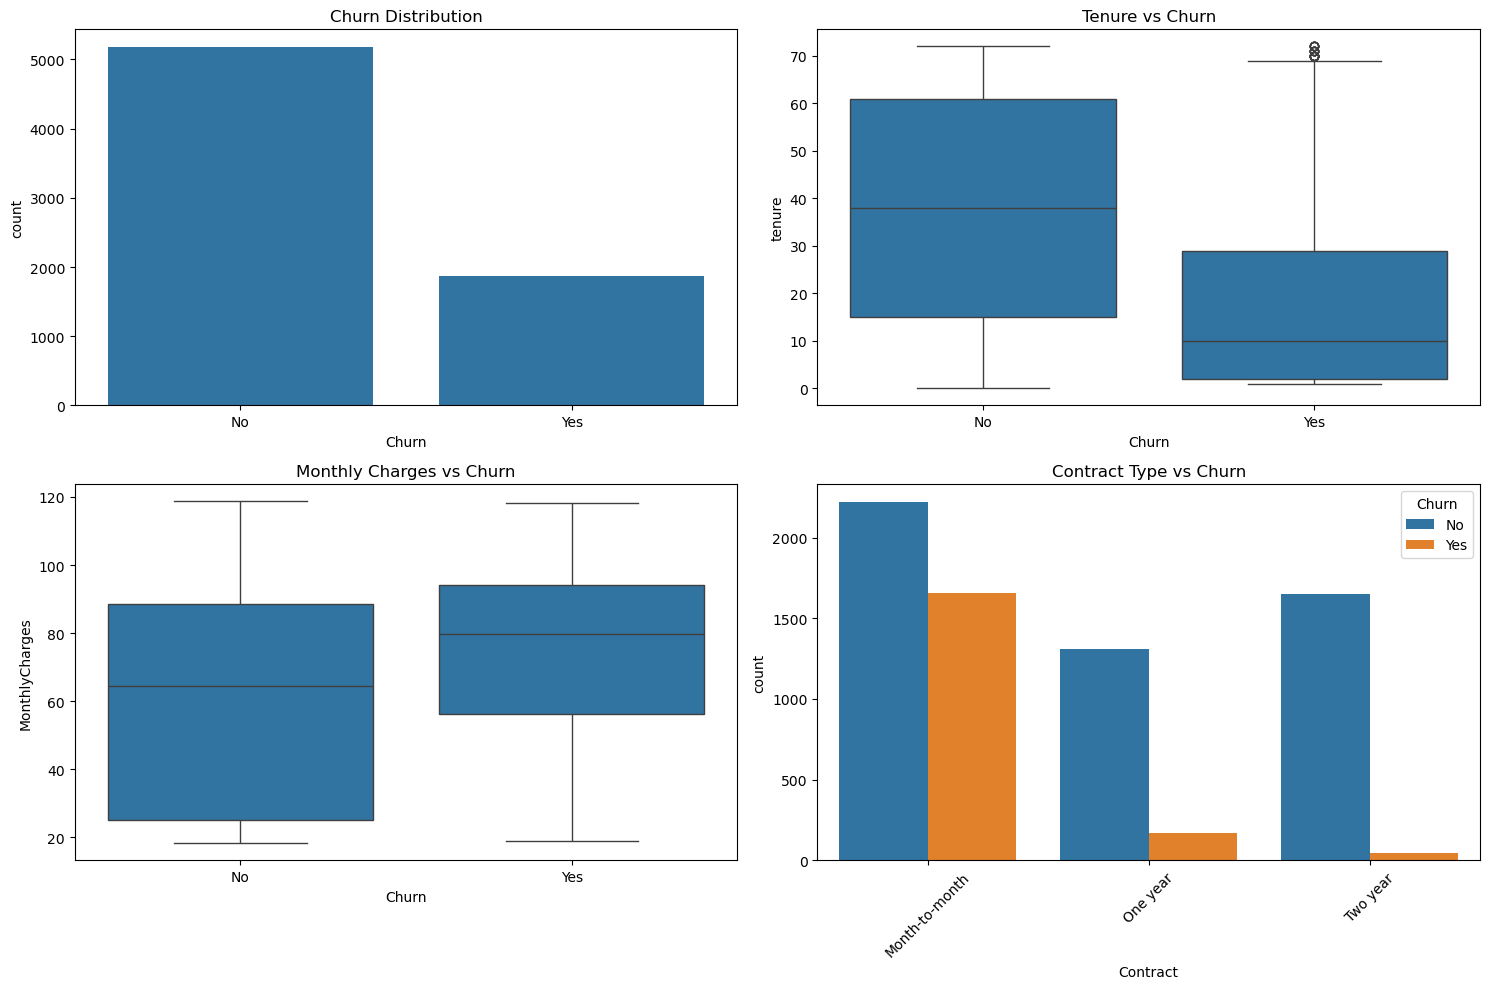

In [73]:
def main():
    # Load data
    df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Data loaded successfully. Shape:", df.shape)
    
    # Quick data check
    print("\nColumns:", df.columns.tolist())
    print("\nSample data:")
    print(df.head())
    
    # Proceed with analysis
    perform_eda(df)
    
if __name__ == "__main__":
    main()